<a href="https://colab.research.google.com/github/Fa20/ML_Projects/blob/main/mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from glob import glob
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


**Load the Dataset**

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Normalize the data**

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

**Build the NN**

Initializing the ANN

In [5]:
model=tf. keras.models.Sequential()


In [6]:
model.add( keras.layers.Flatten(input_shape=(28, 28)))

In [7]:
model.add(keras.layers.Dense(units=512,activation='relu'))

In [8]:
model.add(keras.layers.Dropout(0.2))

 Adding the output layer


In [9]:
model.add(keras.layers.Dense(units=10,activation='softmax'))

 **Compiling the ANN**

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



**Training the ANN on the Training set**

In [11]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2202 - accuracy: 0.9347
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0962 - accuracy: 0.9705
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0676 - accuracy: 0.9790
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0539 - accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0454 - accuracy: 0.9851
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - accuracy: 0.9884
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0324 - accuracy: 0.9893
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9909
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0229 - accuracy: 0.9924
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss:

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9841
Loss     :  0.0897168219089508
accuracy :  0.9840999841690063
Confusion matrix : 



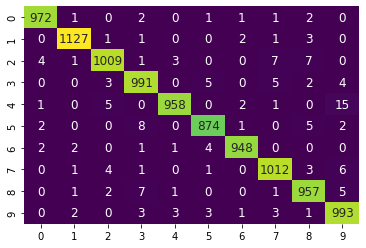

In [22]:

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true,preds):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds)
  print("Confusion matrix : \n")
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()
  return conf_matx
con_mat = draw_confusion_matrix(y_test, y_pred)

